# Magaza Yorumları Sementic Analysis

## Introduction
* Veriler, Türkçe olarak, çeşitli elektronik mağazalardan toplanmıştır. 
* Duygu ayrımı, "Olumlu", "Olumsuz" ve "Tarafsız" olmak üzere üçe ayrılmıştır.

![image](https://www.yasantipsikoloji.com/upload/images/sayfalar/2020/duygusal-problemleri-cozmenin-10-yolu-44069-5315495833-t.jpg)

1. [Import](#1)
1. [Read Data](#2)
1. [Data Information](#3)
1. [Visualization](#4)
1. [Missing Value](#5)
1. [Training](#6)
1. [Conclusion](#7)

<a id = "1"></a><b>
## Import 

In [1]:
import numpy as np
import pandas as pd

import seaborn as sns
import matplotlib.pyplot as plt

* Bert Algorithms

In [2]:
from transformers import AutoModelForSequenceClassification, AutoTokenizer, pipeline

# Öncelikle "avasy/bert-base-turkish-sentiment-cased"'i temel modeliniz olarak tanımlayalım:
model = AutoModelForSequenceClassification.from_pretrained("savasy/bert-base-turkish-sentiment-cased")

# Verilerimizi önceden işlemek için "savasy/bert-base-turkish-sentiment-cased" tokenizer'ı kullanacaksınız
tokenizer = AutoTokenizer.from_pretrained("savasy/bert-base-turkish-sentiment-cased")

c:\users\lenovo\appdata\local\programs\python\python39\lib\site-packages\torchaudio\backend\utils.py:67: UserWarning: No audio backend is available.
  warnings.warn('No audio backend is available.')


<a id = "2"></a><b>
## Read Data

In [3]:
data = pd.read_csv("magaza_yorumlari_duygu_analizi.csv", encoding = "utf-16")
data = data[:3000]
data.head()

,Görüş,Durum
0,"ses kalitesi ve ergonomisi rezalet, sony olduğ...",Olumsuz
1,hizli teslimat tesekkürler,Tarafsız
2,ses olayı süper....gece çalıştır sıkıntı yok.....,Olumlu
3,geldi bigün kullandık hemen bozoldu hiçtavsiye...,Olumsuz
4,Kulaklığın sesi kaliteli falan değil. Aleti öv...,Olumsuz


In [4]:
gorus = data["Görüş"]
durum = data["Durum"]

<a id = "3"></a><b>
## Data Information

In [5]:
data.describe()

,Görüş,Durum
count,2999,3000
unique,2997,3
top,kullanişlı,Olumsuz
freq,2,1148


In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000 entries, 0 to 2999
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Görüş   2999 non-null   object
 1   Durum   3000 non-null   object
dtypes: object(2)
memory usage: 47.0+ KB


* Görüşte bir tane eksik verimiz olduğu için değerimiz 2999 gösteriyor

In [7]:
type(data["Görüş"][5])

str

* Label Encoder

In [8]:
durum = [0 if i == "Olumsuz" else 1 if i == "Olumlu" else 2 for i in data["Durum"]]

In [9]:
durum = pd.DataFrame(data = durum, index = range(len(durum)), columns = ["Durum"])
data = pd.concat([gorus, durum], axis = 1)
data

,Görüş,Durum
0,"ses kalitesi ve ergonomisi rezalet, sony olduğ...",0
1,hizli teslimat tesekkürler,2
2,ses olayı süper....gece çalıştır sıkıntı yok.....,1
3,geldi bigün kullandık hemen bozoldu hiçtavsiye...,0
4,Kulaklığın sesi kaliteli falan değil. Aleti öv...,0
...,...,...
2995,Anneme anneler günü hediyesi aldım süpürge on ...,1
2996,Hayır. 1 kere kullandık bozuldu. Servis nasıl ...,0
2997,"Ürün açıklamasında hem 4.7""-6.0"" arası modelle...",2
2998,Olumsuz yönleri: Ürün geldiğinde bozuk çıktı. ...,0


<a id = "4"></a><b>
## Visualization

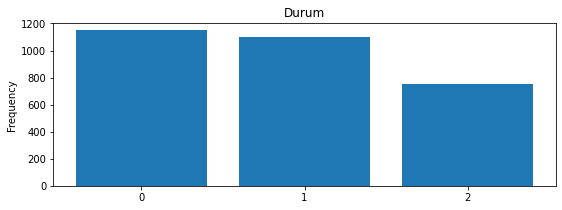

Durum: 
 0    1148
1    1098
2     754
Name: Durum, dtype: int64


In [10]:
var = data["Durum"]
    
# count number of categorical variable 
varValue = var.value_counts()
    
# visualize
plt.figure(figsize = (9, 3))
plt.bar(varValue.index, varValue)
plt.xticks(varValue.index, varValue.index.values)
plt.ylabel("Frequency")
plt.title("Durum")
plt.show()
print("{}: \n {}".format("Durum", varValue))

* Positive: 1097
* Negative: 1148
* Notr: 754

<a id = "5"></a><b>
## Missing Value

In [11]:
data.isnull().sum()

Görüş    1
Durum    0
dtype: int64

In [12]:
data = data.dropna().reset_index()
data.isnull().sum()

index    0
Görüş    0
Durum    0
dtype: int64

<a id = "6"></a><b>
## Training

duyarlılık analizi modeli kullanabilirsiniz. (sementic analysis model)
 * pipeline("sentiment-analysis", tokenizer=tokenizer, model=model)

In [13]:
predict = pipeline("sentiment-analysis", tokenizer=tokenizer, model=model)

In [14]:
data["Görüş"][2]

'ses olayı süper....gece çalıştır sıkıntı yok.....kablo uzun işinizi çok rahat ettirir.....çekme olayı son derece güzel içiniz rahat olsun......diğerlerini saymıyorum bile.....'

In [15]:
predict(data["Görüş"][2])

[{'label': 'positive', 'score': 0.9885020852088928}]

In [16]:
label_list = []
score_list = []
for d in range(len(data)):
    for i in predict(data["Görüş"][d]):
        label, score = i.values()
        label_list.append(label)
        score_list.append(score)
data["Sementic"] = pd.DataFrame(data = label_list, index = range(len(label_list)), columns = ["Sementic"])
data["Probability"] = pd.DataFrame(data = score_list, index = range(len(score_list)), columns = ["Probability"])

<a id = "7"></a><b>
## Probability Visualization

In [17]:
print("minimum probability score: ", min(score_list))
print("maximum probability score: ", max(score_list))

minimum probability score:  0.501057505607605
maximum probability score:  0.9998788237571716


In [18]:
min_probability = data[data["Probability"] < 0.7]["Probability"]
max_probability = data[data["Probability"] > 0.7]["Probability"]

* Minumum probability score
    * probability score < 0.7

In [19]:
min_probability.index

Int64Index([   5,   22,   23,   51,   64,  113,  117,  123,  128,  133,
            ...
            2790, 2792, 2799, 2825, 2840, 2903, 2927, 2947, 2959, 2987],
           dtype='int64', length=220)

In [30]:
max_probability.index

Int64Index([   0,    1,    2,    3,    4,    6,    7,    8,    9,   10,
            ...
            2989, 2990, 2991, 2992, 2993, 2994, 2995, 2996, 2997, 2998],
           dtype='int64', length=2779)

* Maximum probability score
    * probability score > 0.7

In [20]:
max_probability

0       0.999512
1       0.795702
2       0.988502
3       0.997646
4       0.998313
          ...   
2994    0.846864
2995    0.999010
2996    0.999378
2997    0.999654
2998    0.998921
Name: Probability, Length: 2779, dtype: float64

* Total probability score

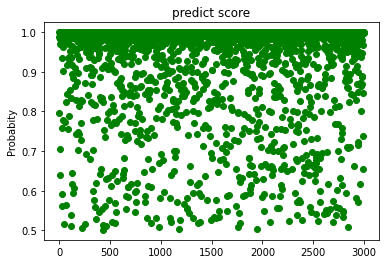

In [21]:
plt.scatter(range(len(score_list)), score_list , color = "green")
plt.ylabel("Probabity")
plt.title("predict score")
plt.show()

* Maximum probability score is blue
* Minimum probability score is red

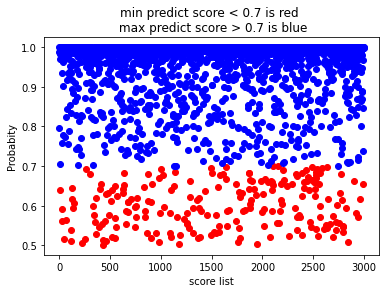

In [22]:
plt.scatter(min_probability.index, min_probability , color = "red")
plt.scatter(max_probability.index, max_probability , color = "blue")
plt.xlabel("score list")
plt.ylabel("Probabity")
plt.title("min predict score < 0.7 is red \n max predict score > 0.7 is blue")
plt.show()

As seen in the figure, the probability of knowing the results correctly is high.

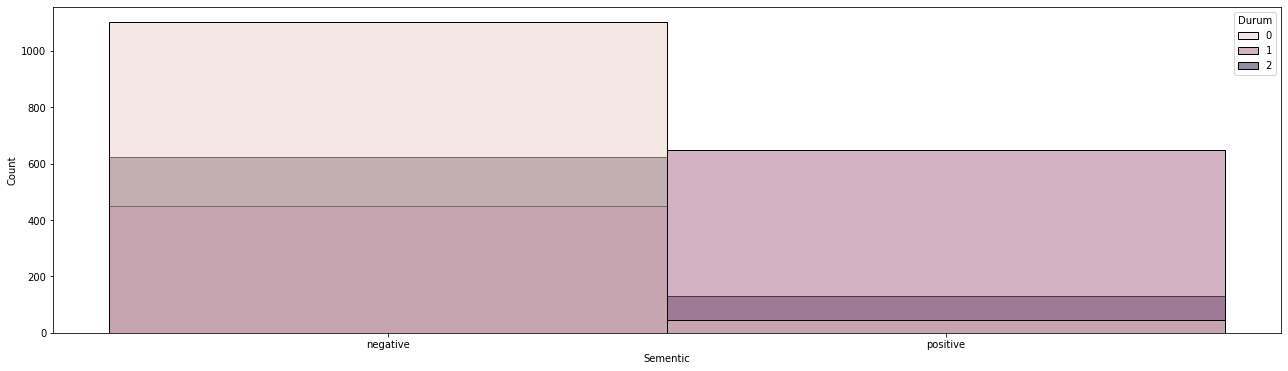

In [72]:
plt.figure(figsize = (22, 6))
sns.histplot(data = data, x = "Sementic", hue = "Durum")
plt.show()

Examination of the values in the sementic part of our data.
* In negative values as a result of the estimation:
    * Guess 0 values: in color at 0
    * 1 to guess the values: 1 in color
    * 2 values to guess: 2 in color
* In positive values as a result of the estimation:
    * Guess 0 values: in color at 0
    * 1 to guess the values: 1 in color
    * 2 values to guess: 2 in color

<a id = "7"></a><b>
## Conclusion

In [75]:
data.head()

,index,Görüş,Durum,Sementic,Probability
0,0,"ses kalitesi ve ergonomisi rezalet, sony olduğ...",0,negative,0.999512
1,1,hizli teslimat tesekkürler,2,positive,0.795702
2,2,ses olayı süper....gece çalıştır sıkıntı yok.....,1,positive,0.988502
3,3,geldi bigün kullandık hemen bozoldu hiçtavsiye...,0,negative,0.997646
4,4,Kulaklığın sesi kaliteli falan değil. Aleti öv...,0,negative,0.998313


* data[0] = 0 negatif olma olasılığı 0.99 
* data[1] = 2 notr olma olasılığı 0.79
* data[2] = 1 pozitif olma olasılığı 0.98